In [48]:
#Importing Libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [56]:
ticker_details = pd.read_excel("Ticker List.xlsx")
ticker = ticker_details['Ticker'].to_list()
names = ticker_details['Description'].to_list()
print(ticker)
print(names)

['GC=F', 'SI=F', 'CL=F', '^GSPC', '^RUT', 'ZN=F', 'ZT=F', 'PL=F', 'HG=F', 'DX=F', '^VIX', 'ZS=F', 'EEM', 'EURUSD=X', '^N100', '^IXIC']
['Gold', 'Silver', 'Crude Oil', 'S&P500', 'Russel 2000 Index', '10 Yr US T-Note futures', '2 Yr US T-Note Futures', 'Platinum', 'Copper', 'Dollar Index', 'Volatility Index', 'Soybean', 'MSCI EM ETF', 'Euro USD', 'Euronext100', 'Nasdaq']


In [57]:
#Preparing Date Range
end_date= datetime.strftime(datetime.today(),'%Y-%m-%d')
start_date = '2019-01-01'
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [58]:
print("Input Range Date")
values['Date']

Input Range Date


0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
569   2021-03-08
570   2021-03-09
571   2021-03-10
572   2021-03-11
573   2021-03-12
Name: Date, Length: 574, dtype: datetime64[ns]

In [59]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
for i in ticker:
    raw_data = YahooFinancials(i)
    raw_data = raw_data.get_historical_price_data(start_date, end_date,'daily')
    df = pd.DataFrame(raw_data[i]['prices'])[['formatted_date','adjclose']]
    df.columns = ['Date1',i]
    df['Date1']= pd.to_datetime(df['Date1'])
    values = values.merge(df,how='left',left_on='Date',right_on='Date1')
    values = values.drop(labels='Date1',axis=1)
    
#Renaming columns to represent instrument names rather than their ticker codes for ease of readability
names.insert(0,'Date')
values.columns = names

In [60]:
values

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.149306,NaN,NaN
1,2019-01-02,1281.000000,15.542000,46.540001,2510.030029,1355.910034,122.187500,106.125000,799.099976,2.6250,96.422997,23.219999,894.75,37.444263,1.146171,910.349976,6665.939941
2,2019-01-03,1291.800049,15.706000,47.090000,2447.889893,1330.829956,123.156250,106.367188,794.500000,2.5705,95.877998,25.450001,900.25,36.765366,1.131811,897.450012,6463.500000
3,2019-01-04,1282.699951,15.695000,47.959999,2531.939941,1380.750000,122.296875,106.164062,822.000000,2.6515,95.750000,21.379999,909.50,37.951038,1.139108,921.299988,6738.859863
4,2019-01-07,1286.800049,15.669000,48.520000,2549.689941,1405.369995,122.046875,106.078125,818.400024,2.6410,95.227997,21.400000,912.25,38.037098,1.141044,919.659973,6823.470215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2021-03-08,1677.699951,25.240000,65.050003,3821.350098,2202.979980,132.984375,110.398438,1151.099976,4.1035,92.334000,25.469999,1437.75,52.380001,1.192563,1153.140015,12609.160156
570,2021-03-09,1716.599976,26.148001,64.010002,3875.439941,2245.060059,133.406250,110.398438,1174.199951,4.0195,91.963997,24.030001,1441.25,53.529999,1.185171,1163.109985,13073.820312
571,2021-03-10,1721.500000,26.101999,64.440002,3898.810059,2285.679932,133.625000,110.414062,1200.599976,4.0420,91.828003,22.559999,1411.50,53.290001,1.189791,1173.010010,13068.830078
572,2021-03-11,1722.300049,26.162001,66.019997,3939.340088,2338.540039,133.718750,110.445312,1201.099976,4.1430,91.417999,21.910000,1415.50,54.970001,1.192606,1183.270020,13398.669922


In [64]:
#Front filling the NaN values in the data set(เติมค่าว่างด้วยค่าก่อนหน้าและค่าข้างหลัง)
values = values.fillna(method="ffill",axis=0)
values = values.fillna(method="bfill",axis=0)

In [65]:
values

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,2019-01-01,1281.000000,15.542000,46.540001,2510.030029,1355.910034,122.187500,106.125000,799.099976,2.6250,96.422997,23.219999,894.75,37.444263,1.149306,910.349976,6665.939941
1,2019-01-02,1281.000000,15.542000,46.540001,2510.030029,1355.910034,122.187500,106.125000,799.099976,2.6250,96.422997,23.219999,894.75,37.444263,1.146171,910.349976,6665.939941
2,2019-01-03,1291.800049,15.706000,47.090000,2447.889893,1330.829956,123.156250,106.367188,794.500000,2.5705,95.877998,25.450001,900.25,36.765366,1.131811,897.450012,6463.500000
3,2019-01-04,1282.699951,15.695000,47.959999,2531.939941,1380.750000,122.296875,106.164062,822.000000,2.6515,95.750000,21.379999,909.50,37.951038,1.139108,921.299988,6738.859863
4,2019-01-07,1286.800049,15.669000,48.520000,2549.689941,1405.369995,122.046875,106.078125,818.400024,2.6410,95.227997,21.400000,912.25,38.037098,1.141044,919.659973,6823.470215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2021-03-08,1677.699951,25.240000,65.050003,3821.350098,2202.979980,132.984375,110.398438,1151.099976,4.1035,92.334000,25.469999,1437.75,52.380001,1.192563,1153.140015,12609.160156
570,2021-03-09,1716.599976,26.148001,64.010002,3875.439941,2245.060059,133.406250,110.398438,1174.199951,4.0195,91.963997,24.030001,1441.25,53.529999,1.185171,1163.109985,13073.820312
571,2021-03-10,1721.500000,26.101999,64.440002,3898.810059,2285.679932,133.625000,110.414062,1200.599976,4.0420,91.828003,22.559999,1411.50,53.290001,1.189791,1173.010010,13068.830078
572,2021-03-11,1722.300049,26.162001,66.019997,3939.340088,2338.540039,133.718750,110.445312,1201.099976,4.1430,91.417999,21.910000,1415.50,54.970001,1.192606,1183.270020,13398.669922


In [66]:
# Co-ercing numeric type to all columns except Date
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)
imp = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF']

# Calculating Short term -Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=values['Date'])
for i in change_days:
    x= values[cols].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]


In [67]:
print("change_days",change_days)

change_days [1, 3, 5, 14, 21]


In [69]:
print("values[cols]")
values[cols]

values[cols]


,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
1,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
2,1291.8,15.7,47.1,2447.9,1330.8,123.2,106.4,794.5,2.6,95.9,25.5,900.2,36.8,1.1,897.5,6463.5
3,1282.7,15.7,48.0,2531.9,1380.8,122.3,106.2,822.0,2.7,95.8,21.4,909.5,38.0,1.1,921.3,6738.9
4,1286.8,15.7,48.5,2549.7,1405.4,122.0,106.1,818.4,2.6,95.2,21.4,912.2,38.0,1.1,919.7,6823.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,1677.7,25.2,65.1,3821.4,2203.0,133.0,110.4,1151.1,4.1,92.3,25.5,1437.8,52.4,1.2,1153.1,12609.2
570,1716.6,26.1,64.0,3875.4,2245.1,133.4,110.4,1174.2,4.0,92.0,24.0,1441.2,53.5,1.2,1163.1,13073.8
571,1721.5,26.1,64.4,3898.8,2285.7,133.6,110.4,1200.6,4.0,91.8,22.6,1411.5,53.3,1.2,1173.0,13068.8
572,1722.3,26.2,66.0,3939.3,2338.5,133.7,110.4,1201.1,4.1,91.4,21.9,1415.5,55.0,1.2,1183.3,13398.7


In [70]:
print("data")
data

data


,Date,Gold-T-1,Silver-T-1,Crude Oil-T-1,S&P500-T-1,Russel 2000 Index-T-1,10 Yr US T-Note futures-T-1,2 Yr US T-Note Futures-T-1,Platinum-T-1,Copper-T-1,Dollar Index-T-1,Volatility Index-T-1,Soybean-T-1,MSCI EM ETF-T-1,Euro USD-T-1,Euronext100-T-1,Nasdaq-T-1,Gold-T-3,Silver-T-3,Crude Oil-T-3,S&P500-T-3,Russel 2000 Index-T-3,10 Yr US T-Note futures-T-3,2 Yr US T-Note Futures-T-3,Platinum-T-3,Copper-T-3,Dollar Index-T-3,Volatility Index-T-3,Soybean-T-3,MSCI EM ETF-T-3,Euro USD-T-3,Euronext100-T-3,Nasdaq-T-3,Gold-T-5,Silver-T-5,Crude Oil-T-5,S&P500-T-5,Russel 2000 Index-T-5,10 Yr US T-Note futures-T-5,2 Yr US T-Note Futures-T-5,Platinum-T-5,Copper-T-5,Dollar Index-T-5,Volatility Index-T-5,Soybean-T-5,MSCI EM ETF-T-5,Euro USD-T-5,Euronext100-T-5,Nasdaq-T-5,Gold-T-14,Silver-T-14,Crude Oil-T-14,S&P500-T-14,Russel 2000 Index-T-14,10 Yr US T-Note futures-T-14,2 Yr US T-Note Futures-T-14,Platinum-T-14,Copper-T-14,Dollar Index-T-14,Volatility Index-T-14,Soybean-T-14,MSCI EM ETF-T-14,Euro USD-T-14,Euronext100-T-14,Nasdaq-T-14,Gold-T-21,Silver-T-21,Crude Oil-T-21,S&P500-T-21,Russel 2000 Index-T-21,10 Yr US T-Note futures-T-21,2 Yr US T-Note Futures-T-21,Platinum-T-21,Copper-T-21,Dollar Index-T-21,Volatility Index-T-21,Soybean-T-21,MSCI EM ETF-T-21,Euro USD-T-21,Euronext100-T-21,Nasdaq-T-21
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.008431,0.012903,0.012903,-0.024741,-0.018512,0.008183,0.002828,-0.005756,0.000000,-0.005187,0.099138,0.006035,-0.016043,0.0,-0.014061,-0.030363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,-0.007044,0.000000,0.019108,0.034315,0.037571,-0.007305,-0.001880,0.034613,0.038462,-0.001043,-0.160784,0.010331,0.032609,0.0,0.026518,0.042608,0.001327,0.012903,0.032258,0.008725,0.018364,0.000818,0.000943,0.028657,0.038462,-0.006224,-0.077586,0.016428,0.016043,0.0,0.012084,0.010951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-07,0.003196,0.000000,0.010417,0.007030,0.017816,-0.002453,-0.000942,-0.004380,-0.037037,-0.006263,0.000000,0.002969,0.000000,0.0,-0.001737,0.012554,0.004528,0.012903,0.043011,0.015817,0.036507,-0.001637,0.000000,0.024152,0.000000,-0.012448,-0.077586,0.019446,0.016043,0.0,0.010326,0.023643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2021-03-08,-0.011955,-0.003953,-0.015129,-0.005336,0.004927,-0.003745,-0.000905,0.021294,0.000000,0.003261,0.032389,0.002510,-0.026022,0.0,0.017471,-0.024071,-0.021920,-0.045455,0.061990,0.000445,-0.002174,-0.008203,0.000000,-0.0248

In [71]:
# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
    x= values[imp].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]

In [74]:
print("change_days",change_days)

change_days [60, 90, 180, 250]


In [75]:
print("values[imp]")
values[imp]

values[imp]


,Gold,Silver,Crude Oil,S&P500,MSCI EM ETF
0,1281.0,15.5,46.5,2510.0,37.4
1,1281.0,15.5,46.5,2510.0,37.4
2,1291.8,15.7,47.1,2447.9,36.8
3,1282.7,15.7,48.0,2531.9,38.0
4,1286.8,15.7,48.5,2549.7,38.0
...,...,...,...,...,...
569,1677.7,25.2,65.1,3821.4,52.4
570,1716.6,26.1,64.0,3875.4,53.5
571,1721.5,26.1,64.4,3898.8,53.3
572,1722.3,26.2,66.0,3939.3,55.0


In [76]:
print("data")
data

data


,Date,Gold-T-1,Silver-T-1,Crude Oil-T-1,S&P500-T-1,Russel 2000 Index-T-1,10 Yr US T-Note futures-T-1,2 Yr US T-Note Futures-T-1,Platinum-T-1,Copper-T-1,Dollar Index-T-1,Volatility Index-T-1,Soybean-T-1,MSCI EM ETF-T-1,Euro USD-T-1,Euronext100-T-1,Nasdaq-T-1,Gold-T-3,Silver-T-3,Crude Oil-T-3,S&P500-T-3,Russel 2000 Index-T-3,10 Yr US T-Note futures-T-3,2 Yr US T-Note Futures-T-3,Platinum-T-3,Copper-T-3,Dollar Index-T-3,Volatility Index-T-3,Soybean-T-3,MSCI EM ETF-T-3,Euro USD-T-3,Euronext100-T-3,Nasdaq-T-3,Gold-T-5,Silver-T-5,Crude Oil-T-5,S&P500-T-5,Russel 2000 Index-T-5,10 Yr US T-Note futures-T-5,2 Yr US T-Note Futures-T-5,Platinum-T-5,Copper-T-5,Dollar Index-T-5,Volatility Index-T-5,Soybean-T-5,MSCI EM ETF-T-5,Euro USD-T-5,Euronext100-T-5,Nasdaq-T-5,Gold-T-14,Silver-T-14,Crude Oil-T-14,S&P500-T-14,Russel 2000 Index-T-14,10 Yr US T-Note futures-T-14,2 Yr US T-Note Futures-T-14,Platinum-T-14,Copper-T-14,Dollar Index-T-14,Volatility Index-T-14,Soybean-T-14,MSCI EM ETF-T-14,Euro USD-T-14,Euronext100-T-14,Nasdaq-T-14,Gold-T-21,Silver-T-21,Crude Oil-T-21,S&P500-T-21,Russel 2000 Index-T-21,10 Yr US T-Note futures-T-21,2 Yr US T-Note Futures-T-21,Platinum-T-21,Copper-T-21,Dollar Index-T-21,Volatility Index-T-21,Soybean-T-21,MSCI EM ETF-T-21,Euro USD-T-21,Euronext100-T-21,Nasdaq-T-21,Gold-T-60,Silver-T-60,Crude Oil-T-60,S&P500-T-60,MSCI EM ETF-T-60,Gold-T-90,Silver-T-90,Crude Oil-T-90,S&P500-T-90,MSCI EM ETF-T-90,Gold-T-180,Silver-T-180,Crude Oil-T-180,S&P500-T-180,MSCI EM ETF-T-180,Gold-T-250,Silver-T-250,Crude Oil-T-250,S&P500-T-250,MSCI EM ETF-T-250
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.008431,0.012903,0.012903,-0.024741,-0.018512,0.008183,0.002828,-0.005756,0.000000,-0.005187,0.099138,0.006035,-0.016043,0.0,-0.014061,-0.030363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,-0.007044,0.000000,0.019108,0.034315,0.037571,-0.007305,-0.001880,0.034613,0.038462,-0.001043,-0.160784,0.010331,0.032609,0.0,0.026518,0.042608,0.001327,0.012903,0.032258,0.008725,0.018364,0.000818,0.000943,0.028657,0.038462,-0.006224,-0.077586,0.016428,0.016043,0.0,0.012084,0.010951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-07,0.003196,0.000000,0.010417,0.007030,0.017816,-0.002453,-0.000942,-0.004380,-0.037037,-0.006263,0.000000,0.002969,0.000000,0.0,-0.001737,0.012554,0.004528,0.012903,0.043011,0.015817,0.036507,-0.001637,0.000000,0.024152,0.000000,-0.012448,-0.077586,0.019446,0.016043,0.0,0.010326,0.023643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [77]:
print("cols")
cols

cols


Index(['Gold', 'Silver', 'Crude Oil', 'S&P500', 'Russel 2000 Index',
       '10 Yr US T-Note futures', '2 Yr US T-Note Futures', 'Platinum',
       'Copper', 'Dollar Index', 'Volatility Index', 'Soybean', 'MSCI EM ETF',
       'Euro USD', 'Euronext100', 'Nasdaq'],
      dtype='object')

In [78]:
print("values[cols]")
values[cols]

values[cols]


,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
1,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
2,1291.8,15.7,47.1,2447.9,1330.8,123.2,106.4,794.5,2.6,95.9,25.5,900.2,36.8,1.1,897.5,6463.5
3,1282.7,15.7,48.0,2531.9,1380.8,122.3,106.2,822.0,2.7,95.8,21.4,909.5,38.0,1.1,921.3,6738.9
4,1286.8,15.7,48.5,2549.7,1405.4,122.0,106.1,818.4,2.6,95.2,21.4,912.2,38.0,1.1,919.7,6823.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,1677.7,25.2,65.1,3821.4,2203.0,133.0,110.4,1151.1,4.1,92.3,25.5,1437.8,52.4,1.2,1153.1,12609.2
570,1716.6,26.1,64.0,3875.4,2245.1,133.4,110.4,1174.2,4.0,92.0,24.0,1441.2,53.5,1.2,1163.1,13073.8
571,1721.5,26.1,64.4,3898.8,2285.7,133.6,110.4,1200.6,4.0,91.8,22.6,1411.5,53.3,1.2,1173.0,13068.8
572,1722.3,26.2,66.0,3939.3,2338.5,133.7,110.4,1201.1,4.1,91.4,21.9,1415.5,55.0,1.2,1183.3,13398.7


In [79]:
#Calculating Moving averages for Gold
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
moving_avg['Gold/90EMA'] = (values['Gold']/(values['Gold'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/180EMA'] = (values['Gold']/(values['Gold'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
moving_avg = moving_avg.dropna(axis=0)

In [80]:
print("moving_avg")
moving_avg

moving_avg


,Date,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/90EMA,Gold/180EMA
179,2019-09-09,-0.012702,0.000584,0.033540,0.070735,0.113020,0.050884,0.079840
180,2019-09-10,-0.019909,-0.008676,0.023665,0.060516,0.103253,0.041567,0.070313
181,2019-09-11,-0.016773,-0.007452,0.024724,0.061629,0.105318,0.043395,0.072257
182,2019-09-12,-0.014005,-0.006308,0.026432,0.062878,0.107557,0.045313,0.074313
183,2019-09-13,-0.017598,-0.012468,0.019987,0.055640,0.100851,0.038947,0.067790
184,2019-09-16,-0.008548,-0.005233,0.027294,0.062581,0.108876,0.046339,0.075485
185,2019-09-17,-0.005660,-0.004627,0.027605,0.062239,0.109342,0.046616,0.075869
186,2019-09-18,-0.002743,-0.003044,0.028121,0.062174,0.110119,0.047156,0.076530
187,2019-09-19,-0.007533,-0.009078,0.020871,0.054001,0.102454,0.039887,0.069087
188,2019-09-20,-0.001118,-0.003427,0.025797,0.058336,0.108005,0.044989,0.074417


In [81]:
#Merging Moving Average values to the feature space
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
data = data[data['Gold-T-250'].notna()]
prediction_data = data.copy()

In [82]:
print("prediction_data")
prediction_data

prediction_data


,Date,Gold-T-1,Silver-T-1,Crude Oil-T-1,S&P500-T-1,Russel 2000 Index-T-1,10 Yr US T-Note futures-T-1,2 Yr US T-Note Futures-T-1,Platinum-T-1,Copper-T-1,Dollar Index-T-1,Volatility Index-T-1,Soybean-T-1,MSCI EM ETF-T-1,Euro USD-T-1,Euronext100-T-1,Nasdaq-T-1,Gold-T-3,Silver-T-3,Crude Oil-T-3,S&P500-T-3,Russel 2000 Index-T-3,10 Yr US T-Note futures-T-3,2 Yr US T-Note Futures-T-3,Platinum-T-3,Copper-T-3,Dollar Index-T-3,Volatility Index-T-3,Soybean-T-3,MSCI EM ETF-T-3,Euro USD-T-3,Euronext100-T-3,Nasdaq-T-3,Gold-T-5,Silver-T-5,Crude Oil-T-5,S&P500-T-5,Russel 2000 Index-T-5,10 Yr US T-Note futures-T-5,2 Yr US T-Note Futures-T-5,Platinum-T-5,Copper-T-5,Dollar Index-T-5,Volatility Index-T-5,Soybean-T-5,MSCI EM ETF-T-5,Euro USD-T-5,Euronext100-T-5,Nasdaq-T-5,Gold-T-14,Silver-T-14,Crude Oil-T-14,S&P500-T-14,Russel 2000 Index-T-14,10 Yr US T-Note futures-T-14,2 Yr US T-Note Futures-T-14,Platinum-T-14,Copper-T-14,Dollar Index-T-14,Volatility Index-T-14,Soybean-T-14,MSCI EM ETF-T-14,Euro USD-T-14,Euronext100-T-14,Nasdaq-T-14,Gold-T-21,Silver-T-21,Crude Oil-T-21,S&P500-T-21,Russel 2000 Index-T-21,10 Yr US T-Note futures-T-21,2 Yr US T-Note Futures-T-21,Platinum-T-21,Copper-T-21,Dollar Index-T-21,Volatility Index-T-21,Soybean-T-21,MSCI EM ETF-T-21,Euro USD-T-21,Euronext100-T-21,Nasdaq-T-21,Gold-T-60,Silver-T-60,Crude Oil-T-60,S&P500-T-60,MSCI EM ETF-T-60,Gold-T-90,Silver-T-90,Crude Oil-T-90,S&P500-T-90,MSCI EM ETF-T-90,Gold-T-180,Silver-T-180,Crude Oil-T-180,S&P500-T-180,MSCI EM ETF-T-180,Gold-T-250,Silver-T-250,Crude Oil-T-250,S&P500-T-250,MSCI EM ETF-T-250,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/90EMA,Gold/180EMA
250,2019-12-17,-0.000271,0.000000,0.011628,0.000345,0.004667,0.000778,0.000000,-0.001614,0.000000,-0.002062,0.016529,0.007375,0.009259,0.000000,-0.004711,0.001044,0.005386,0.011905,0.028716,0.007543,0.007782,0.001558,0.000000,-0.015806,0.000000,-0.006160,-0.115108,0.034068,0.018692,0.000000,0.013323,0.012171,0.008205,0.024096,0.028716,0.019154,0.015873,-0.002327,0.000000,0.007930,0.000000,-0.006160,-0.216561,0.030626,0.050602,0.000000,0.016483,0.024048,0.014586,0.005917,0.048193,0.012335,0.014381,-0.006182,0.000000,0.020907,0.037037,-0.015259,0.042373,0.053061,0.048077,0.000000,0.006351,0.013578,0.002515,0.000000,0.068421,0.022582,0.041010,-0.005414,-0.001857,0.039901,0.076923,-0.009212,-0.016000,0.020435,0.050602,0.000000,0.006617,0.031989,-0.037530,-0.081081,0.062827,0.076148,0.098237,-0.018373,0.000000,0.066550,0.090968,0.135417,0.131262,0.118421,-0.048438,0.109200,0.028302,0.151132,0.096774,0.309677,0.271912,0.165775,0.005688,0.005910,-0.003631,-0.011229,0.037102,0.004530,0.021762
251,2019-12-18,-0.001356,0.000000,0.000000,-0.000439,0.002473,-0.002333,0.000930,0.006359,0.000000,0.002066,0.024390,-0.000323,0.004587,0.000000,-0.000526,0.000487,-0.002033,0.005917,0.013311,0.007037,0.014469,-0.006197,0.000000,0.007554,0.000000,-0.002058,0.000000,0.023140,0.023364,0.000000,0.006976,0.010624,0.002178,0.017964,0.035714,0.015756,0.018261,-0.007734,0.000000,-0.003947,0.000000,-0.001030,-0.160000,0.039172,0.040380,0.000000,0.015224,0.020072,0.013210,0.005917,0.048193,0.011891,0.016890,-0.008501,0.000930,0.027399,0.037037,-0.013225,0.067797,0.052721,0.052885,0.000000,0.008045,0.014072,-0.000475,-0.005848,0.103261,0.022723,0.039667,-0.008501,0.000000,0.027060,0.037037,-0.007165,-0.023256,0.018651,0.052885,0.000000,0.009919,0.029986,-0.021268,-0.055556,0.077876,0.069081,0.103275,-0.028564,-0.017341,0.103261,0.123389,0.174263,0.124895,0.118421,-0.057276,0.104875,0.028169,0.149571,0.096774,0.309677,0.271355,0.171123,0.003448,0.004948,-0.004623,-0.012252,0.035034,0.003097,0.020131
252,2019-12-19,0.003803,0.005882,0.004926,0.004481,0.003250,0.002338,0.000000,-0.000214,0.000000,0.000000,-0.007937,-0.004308,0.000000,0.000000,0.002280,0.006740,0.002169,0.005882,0.016611,0.004387,0.010425,0.000778,0.000930,0.004520,0.000000,0.000000,0.033058,0.002711,0.013889,0.000000,-0.002966,0.008282,0.007841,0.017857,0.033784,0.011614,0.

Model 22Day

In [86]:
from pycaret.regression import *
#Loading the stored model
regressor_22 = load_model("22Day Regressor");

#Making Predictions(ค่าเปอร์เซ็นต์แนวโน้ม)
predicted_return_22 = predict_model(regressor_22,data=prediction_data)
predicted_return_22=predicted_return_22[['Date','Label']]
predicted_return_22.columns = ['Date','Return_22']
predicted_return_22


,Date,Return_22
0,2019-12-17,-0.0622
1,2019-12-18,-0.0573
2,2019-12-19,-0.0592
3,2019-12-20,-0.0572
4,2019-12-23,-0.0571
5,2019-12-24,-0.0594
6,2019-12-25,-0.0657
7,2019-12-26,-0.0474
8,2019-12-27,-0.0440
9,2019-12-30,-0.0410


In [87]:
#Adding return Predictions to Gold Values
predicted_values = values[['Date','Gold']]
predicted_values = predicted_values.tail(len(predicted_return_22))
predicted_values = pd.merge(left=predicted_values,right=predicted_return_22,on=['Date'],how='inner')
predicted_values['Gold-T+22']=(predicted_values['Gold']*(1+predicted_values['Return_22'])).round(decimals =1)
predicted_values


,Date,Gold,Return_22,Gold-T+22
0,2019-12-17,1474.6,-0.0622,1382.9
1,2019-12-18,1472.6,-0.0573,1388.2
2,2019-12-19,1478.2,-0.0592,1390.7
3,2019-12-20,1474.7,-0.0572,1390.3
4,2019-12-23,1482.5,-0.0571,1397.8
5,2019-12-24,1482.5,-0.0594,1394.4
6,2019-12-25,1482.5,-0.0657,1385.1
7,2019-12-26,1509.3,-0.0474,1437.8
8,2019-12-27,1513.8,-0.0440,1447.2
9,2019-12-30,1514.5,-0.0410,1452.4


In [25]:
#Adding T+22 Date
from datetime import datetime, timedelta
predicted_values['Date-T+22'] = predicted_values['Date']+timedelta(days = 22)
#predicted_values.tail()
#predicted_values.head()
#predicted_values

Day22 = predicted_values['Date-T+22']
Gold22 = predicted_values['Gold-T+22']

In [26]:
predicted_values

,Date,Gold,Return_22,Gold-T+22,Date-T+22
0,2019-12-17,1474.6,-0.0622,1382.9,2020-01-08
1,2019-12-18,1472.6,-0.0573,1388.2,2020-01-09
2,2019-12-19,1478.2,-0.0592,1390.7,2020-01-10
3,2019-12-20,1474.7,-0.0572,1390.3,2020-01-11
4,2019-12-23,1482.5,-0.0571,1397.8,2020-01-14
5,2019-12-24,1482.5,-0.0594,1394.4,2020-01-15
6,2019-12-25,1482.5,-0.0657,1385.1,2020-01-16
7,2019-12-26,1509.3,-0.0474,1437.8,2020-01-17
8,2019-12-27,1513.8,-0.0440,1447.2,2020-01-18
9,2019-12-30,1514.5,-0.0410,1452.4,2020-01-21


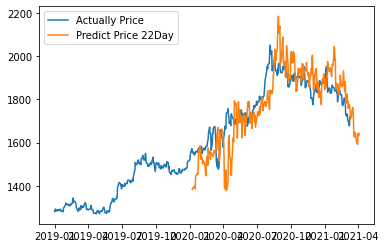

In [27]:
plt.plot(values['Date'],values['Gold'],label='Actually Price')
plt.plot(predicted_values['Date-T+22'],predicted_values['Gold-T+22'],label='Predict Price 22Day')
plt.legend()

Model 14Day

In [28]:
from pycaret.regression import *
#Loading the stored model
regressor_14 = load_model("14Day Regressor");
#Making Predictions
predicted_return_14 = predict_model(regressor_14,data=prediction_data)
predicted_return_14=predicted_return_14[['Date','Label']]
predicted_return_14.columns = ['Date','Return_14']


#Adding return Predictions to Gold Values
predicted_values = values[['Date','Gold']]
predicted_values = predicted_values.tail(len(predicted_return_14))
predicted_values = pd.merge(left=predicted_values,right=predicted_return_14,on=['Date'],how='inner')
predicted_values['Gold-T+14']=(predicted_values['Gold']*(1+predicted_values['Return_14'])).round(decimals =1)


In [29]:
#Adding T+14 Date
from datetime import datetime, timedelta
predicted_values['Date-T+14'] = predicted_values['Date']+timedelta(days = 14)
#predicted_values.tail()
#predicted_values.head()
#predicted_values

Day14 = predicted_values['Date-T+14']
Gold14 = predicted_values['Gold-T+14']

In [30]:
predicted_values

,Date,Gold,Return_14,Gold-T+14,Date-T+14
0,2019-12-17,1474.6,-0.0639,1380.4,2019-12-31
1,2019-12-18,1472.6,-0.0589,1385.9,2020-01-01
2,2019-12-19,1478.2,-0.0598,1389.8,2020-01-02
3,2019-12-20,1474.7,-0.0518,1398.3,2020-01-03
4,2019-12-23,1482.5,-0.0508,1407.2,2020-01-06
5,2019-12-24,1482.5,-0.0482,1411.0,2020-01-07
6,2019-12-25,1482.5,-0.0440,1417.3,2020-01-08
7,2019-12-26,1509.3,-0.0289,1465.7,2020-01-09
8,2019-12-27,1513.8,-0.0325,1464.6,2020-01-10
9,2019-12-30,1514.5,-0.0327,1465.0,2020-01-13


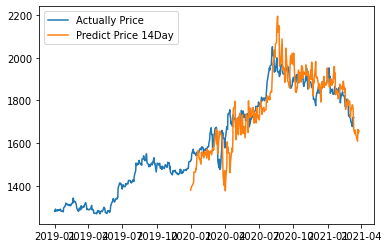

In [31]:
plt.plot(values['Date'],values['Gold'],label='Actually Price')
plt.plot(predicted_values['Date-T+14'],predicted_values['Gold-T+14'],label='Predict Price 14Day')
plt.legend()

In [32]:
#predicted_values['A_bs']=(predicted_values['Gold']-(predicted_values['Gold-T+14']))
# A_bs คือค่าผลต่าง

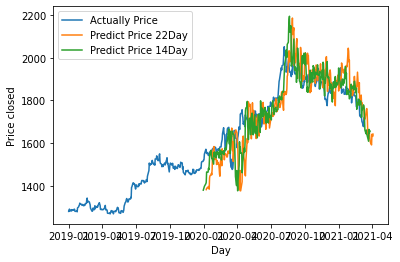

In [33]:
plt.plot(values['Date'],values['Gold'],label='Actually Price')
plt.plot(Day22,Gold22,label='Predict Price 22Day')
plt.plot(Day14,Gold14,label='Predict Price 14Day')
plt.xlabel('Day')
plt.ylabel('Price closed')
#plt.axis([])
plt.legend()
plt.show()